## Kelompok 4
# Nama :
# 1.Muhammad Rabbani Tamam 231351104
# 2.Muhammad Ismail Hasan 231351100
# 3.Muhammad Naufal Rafie Putra 231351101
# 4.Rifat Malik Al Jabar 231351178



In [25]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA

In [26]:
df = pd.read_csv("dataset_2019.csv")

In [27]:
df.head(28)

,Kabupaten,SMP,SMA,DIPLOMA,Jumlah_Pengangguran
0,Purwakarta,8594,23156,1949,43424
1,Karawang,8810,77839,6779,107723
2,Bandung,18838,48722,14339,97956
3,Bogor,36554,129723,129723,253014
4,Sukabumi,28018,34285,4642,89498
5,Cianjur,24340,39141,3079,105125
6,Garut,25311,32272,4173,84045
7,Tasikmalaya,15577,20079,1086,54192
8,Ciamis,8275,17882,2816,31858
9,Kuningan,10147,21716,2207,48270


In [28]:
features = ["SMP",
            "SMA",
            "DIPLOMA",
            "Jumlah_Pengangguran"]

In [29]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [30]:
inertia = []
k_values = range(1, 11)

for K in k_values:
    Kmeans = KMeans(n_clusters=K, random_state=42)
    Kmeans.fit(scaled_features)
    inertia.append(Kmeans.inertia_)

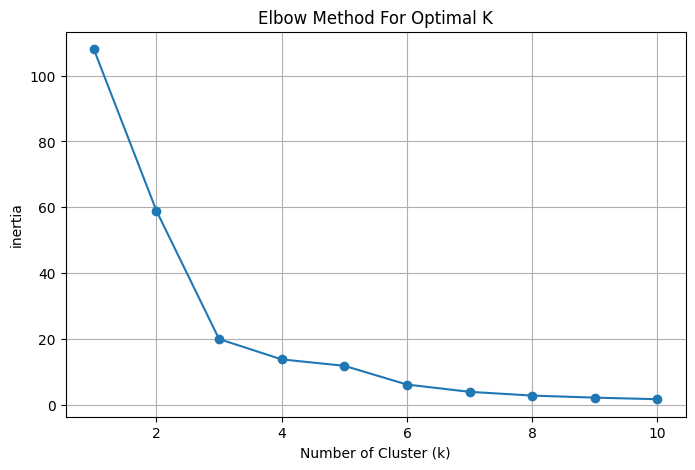

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method For Optimal K")
plt.xlabel("Number of Cluster (k)")
plt.ylabel("inertia")
plt.grid()
plt.show()

In [32]:
optimal_k = 4
Kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = Kmeans.fit_predict(scaled_features)

In [33]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [34]:
colors = ['blue', 'red', 'green', 'purple']

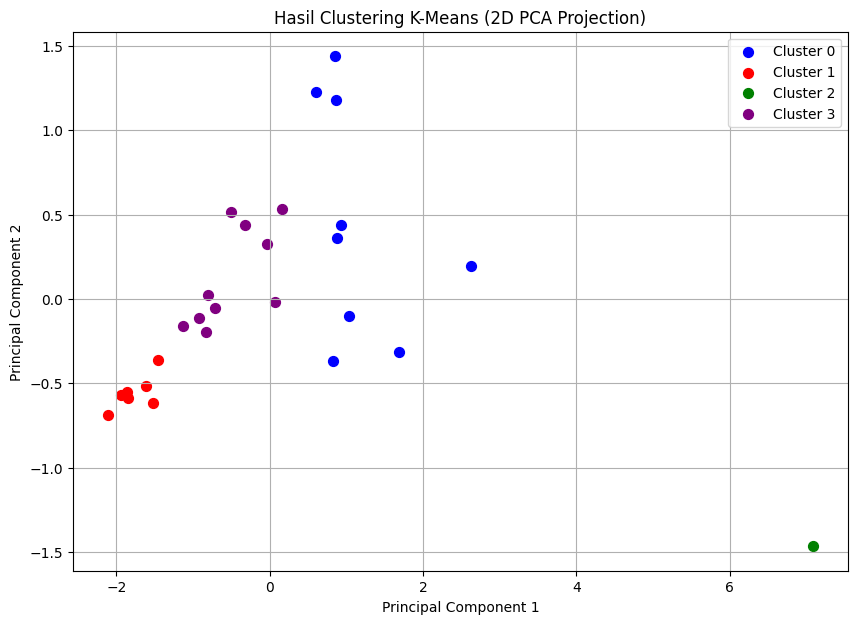

In [35]:
plt.figure(figsize=(10, 7))

for cluster in range(optimal_k):
    cluster_points = reduced_features[df['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0],
                cluster_points[:, 1],
                s=50,
                label=f'Cluster {cluster}',
                color=colors[cluster])



# Detail plot
plt.title("Hasil Clustering K-Means (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()